In [128]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use("ggplot")

In [2]:
import chardet

In [3]:
with open('rounds2.csv', 'rb') as file:
    data = chardet.detect(file.read())
    print(data)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [4]:
rounds2 = pd.read_csv('rounds2.csv', encoding='latin1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
with open('companies.csv', 'rb') as file:
    data = chardet.detect(file.read())
    print(data)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


In [6]:
companies = pd.read_csv('companies.csv', encoding='latin1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
companies.shape

(66368, 10)

In [9]:
len(companies['permalink'].unique())

66368

In [10]:
companies.isnull().sum() * 100 / len(companies.permalink)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [11]:
companies = companies[~companies['country_code'].isnull()]
companies.isnull().sum()

permalink            0
name                 1
homepage_url      3652
category_list     1606
status               0
country_code         0
state_code        1589
region            1072
city              1070
founded_at       11968
dtype: int64

In [12]:
companies.isnull().sum() * 100 / len(companies.permalink)

permalink         0.000000
name              0.001683
homepage_url      6.147113
category_list     2.703249
status            0.000000
country_code      0.000000
state_code        2.674634
region            1.804410
city              1.801044
founded_at       20.144757
dtype: float64

In [13]:
companies['category_list'].mode()

0    Software
dtype: object

In [14]:
companies['category_list'] = companies['category_list'].fillna('Software')
companies.isnull().sum()

permalink            0
name                 1
homepage_url      3652
category_list        0
status               0
country_code         0
state_code        1589
region            1072
city              1070
founded_at       11968
dtype: int64

In [15]:
companies = companies.apply(lambda x: x.astype(str).str.lower())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010
5,/organization/01games-technology,01games technology,http://www.01games.hk/,games,operating,hkg,nan,hong kong,hong kong,nan


In [16]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [17]:
rounds2.describe().astype('int64')

,raised_amount_usd
count,94959
mean,10426869
std,114821247
min,0
25%,322500
50%,1680511
75%,7000000
max,21271935000


In [18]:
rounds2[rounds2['raised_amount_usd'] == 0].count() * 100/len(rounds2)

company_permalink          0.361030
funding_round_permalink    0.361030
funding_round_type         0.361030
funding_round_code         0.013049
funded_at                  0.361030
raised_amount_usd          0.361030
dtype: float64

#### Impute or remove values which are null or 0

In [19]:
rounds2.isnull().sum() * 100 / len(rounds2)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [20]:
rounds2 = rounds2[rounds2['raised_amount_usd'] != 0]


In [21]:
rounds2.describe().astype('int64')

,raised_amount_usd
count,94544
mean,10472637
std,115070895
min,1
25%,336041
50%,1700000
75%,7000000
max,21271935000


In [22]:
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd'].fillna(rounds2['raised_amount_usd'].median())
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83409
funded_at                      0
raised_amount_usd              0
dtype: int64

In [23]:
rounds2 = rounds2.apply(lambda x: x.astype(str).str.lower())
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,nan,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,b,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0


In [24]:
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd'].astype(float)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114534 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114534 non-null  object 
 1   funding_round_permalink  114534 non-null  object 
 2   funding_round_type       114534 non-null  object 
 3   funding_round_code       114534 non-null  object 
 4   funded_at                114534 non-null  object 
 5   raised_amount_usd        114534 non-null  float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


#### Unique values

In [25]:
companies[companies.duplicated() == False].count()

permalink        59410
name             59410
homepage_url     59410
category_list    59410
status           59410
country_code     59410
state_code       59410
region           59410
city             59410
founded_at       59410
dtype: int64

In [26]:
rounds2[rounds2.duplicated() == False].count()

company_permalink          114534
funding_round_permalink    114534
funding_round_type         114534
funding_round_code         114534
funded_at                  114534
raised_amount_usd          114534
dtype: int64

In [27]:
companies['permalink'].isin(rounds2['company_permalink']).value_counts()

True     59124
False      286
Name: permalink, dtype: int64

In [28]:
master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,nan,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


In [29]:
master_frame.shape

(105892, 16)

### Checkpoint 2

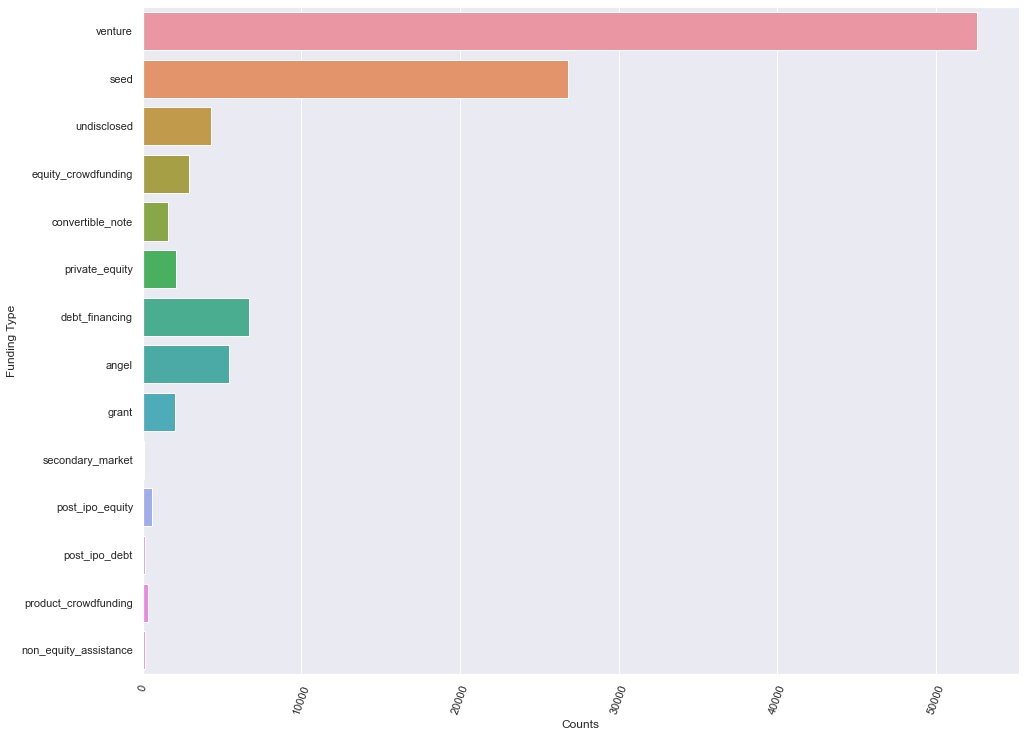

In [130]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
count_plt = sns.countplot(data=master_frame, y='funding_round_type')
count_plt.set(ylabel = "Funding Type", xlabel = "Counts")
plt.xticks(rotation=70)
plt.show()

In [30]:
interested_funding_type = ['seed', 'angel', 'venture', 'private_equity']

In [31]:
interested_funding_frame = master_frame[master_frame['funding_round_type'].isin(interested_funding_type)]
interested_funding_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,nan,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


In [32]:
interested_funding_frame.shape

(86946, 16)

In [33]:
interested_funding_frame.groupby('funding_round_type').describe(percentiles=[0.1, 0.99]).astype('int64')

raised_amount_usd                                      \
                               count      mean        std   min      10%   
funding_round_type                                                         
angel                           5452   1114492    6932830    12    81111   
private_equity                  2110  64246096  188999991  1660  1697000   
seed                           26792    950369    2068587     1    30000   
venture                        52592  10881573   84167302     1   535000   

                                                      
                         50%        99%          max  
funding_round_type                                    
angel                 600000    5903099    494511992  
private_equity      13317592  626819999   4745460219  
seed                  599999    4350993    200000000  
venture              4110078   90000000  17600000000

#### Remove Outliers

In [34]:
min_quantile = interested_funding_frame.groupby('funding_round_type').quantile(0.1)
min_quantile

,raised_amount_usd
funding_round_type,
angel,81111.1
private_equity,1697000.0
seed,30000.0
venture,535000.0


In [35]:
max_quantile = interested_funding_frame.groupby('funding_round_type').quantile(0.92)
max_quantile

,raised_amount_usd
funding_round_type,
angel,1.984076e+06
private_equity,1.750000e+08
seed,2.000000e+06
venture,2.700000e+07


In [36]:
max_quantile['raised_amount_usd']['angel']

1984076.0800000008

#### Most representative value

In [37]:
def remove_outliers(fund_type, amount):
    return True if amount > min_quantile['raised_amount_usd'][fund_type] and amount < max_quantile['raised_amount_usd'][fund_type] else False


In [38]:
interested_funding_frame = interested_funding_frame[interested_funding_frame[['funding_round_type', 'raised_amount_usd']].apply(lambda x: remove_outliers(*x), axis=1)]

In [39]:
interested_funding_frame.groupby('funding_round_type').describe().astype('int64')

raised_amount_usd                                        \
                               count      mean       std      min      25%   
funding_round_type                                                           
angel                           4469    833671    612641    81544   265509   
private_equity                  1729  34019885  40435140  1700000  4000000   
seed                           21888    820031    665772    30015   158060   
venture                        43059   6630127   6151935   535016  1700000   

                                                   
                         50%       75%        max  
funding_round_type                                 
angel                 631720   1700000    1973451  
private_equity      14950000  53767400  171453228  
seed                  600000   1700000    1999997  
venture              4400000  10000000   26999982

In [40]:
mean_df = interested_funding_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

In [41]:
mean_df.apply(lambda x: x > 5000000 and x < 15000000)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

In [42]:
venture_frame = interested_funding_frame[interested_funding_frame['funding_round_type'] == 'venture']
venture_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010
7,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,nan,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,01-01-1997


In [43]:
venture_frame.shape

(43059, 16)

In [44]:
venture_frame.reset_index(drop=True, inplace=True)

In [45]:
venture_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,nan,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,01-01-1997


In [136]:
venture_frame['country_code'].value_counts(20) * 100

usa    71.738777
gbr     4.528670
chn     3.989874
can     2.577858
fra     2.106412
         ...    
per     0.002322
moz     0.002322
kna     0.002322
mar     0.002322
pan     0.002322
Name: country_code, Length: 100, dtype: float64

In [47]:
top9_countries = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(9)
top9_countries

country_code
usa    2.155183e+11
gbr    1.152017e+10
chn    1.131477e+10
can    6.867593e+09
ind    5.792878e+09
isr    5.467339e+09
fra    4.842134e+09
deu    3.839153e+09
che    1.646305e+09
Name: raised_amount_usd, dtype: float64

In [48]:
top9 = venture_frame[venture_frame['country_code'].apply(lambda x: x in top9_countries.keys().tolist())]
top9.reset_index(drop=True, inplace=True)
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,nan,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,01-01-1997


In [49]:
top9.shape

(39226, 16)

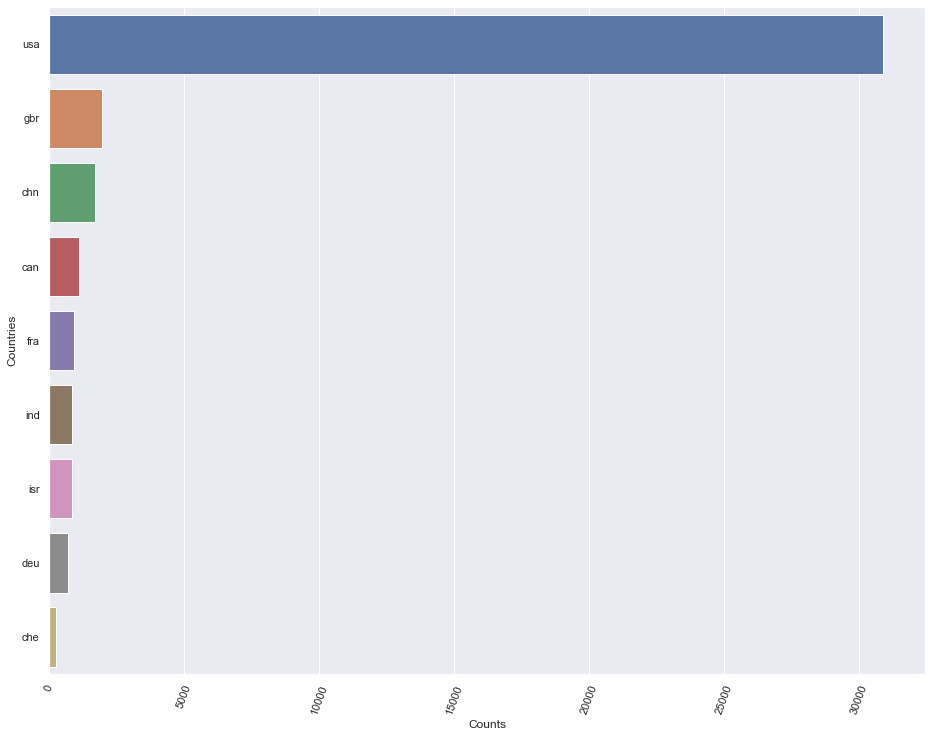

In [139]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
count_plt = sns.countplot(data=top9, y='country_code', order=top9['country_code'].value_counts().index)
count_plt.set(ylabel = "Countries", xlabel = "Counts")
plt.xticks(rotation=70)
plt.show()

#### Extract primary_sector from category_list

In [50]:
top9.reset_index()

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
3,3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010
4,4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,nan,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,01-01-1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39221,39221,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,b,30-06-2013,12000000.0,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,biotechnology,operating,usa,mo,mo - other,fremont,01-01-1998
39222,39222,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,nan,11-07-2013,14219999.0,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,biotechnology,operating,usa,mo,mo - other,fremont,01-01-1998
39223,39223,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,nan,29-01-2010,555016.0,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,biotechnology,operating,usa,mo,mo - other,fremont,01-01-1998
39224,39224,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,a,16-12-2004,8500000.0,/organization/zystor,zystor,http://www.zystor.com,biotechnology,acquired,usa,wi,milwaukee,milwaukee,nan


In [51]:
top9['primary_sector'] = top9['category_list'].str.split('|', 2).str[0]
top9.head()

<ipython-input-51-6c3bd0d4339b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9['primary_sector'] = top9['category_list'].str.split('|', 2).str[0]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,a,14-10-2014,1700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,application platforms
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,a,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,curated web
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,24-07-2014,1700000.0,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010,software
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,nan,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,biotechnology,operating,can,bc,vancouver,vancouver,01-01-1997,biotechnology


#### Checkpoint 4

In [52]:
# Import mappings

In [53]:
mappings = pd.read_csv('mapping.csv')
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [54]:
id_vars = list(mappings.columns[: 1])
id_vars

['category_list']

In [55]:
value_vars = list(np.setdiff1d(mappings.columns, id_vars))
value_vars

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [56]:
mappings = pd.melt(mappings, id_vars=id_vars, value_vars=value_vars)
mappings.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [57]:
mappings = mappings[mappings['value'] == 1]
mappings.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [58]:
mappings = mappings.drop('value', axis = 1)
mappings.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [59]:
mappings = mappings.rename(columns={'variable': 'sector'})
mappings.head()

,category_list,sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [60]:
mappings.reset_index(inplace=True, drop = True)

In [61]:
mappings.head()

,category_list,sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [62]:
mappings = mappings.apply(lambda x: x.astype(str).str.lower())

In [63]:
merged_df = pd.merge(top9, mappings, left_on='primary_sector', right_on='category_list', how = 'inner')
merged_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,media,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,nan,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,nan,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,nan,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,a,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,nan,media,media,entertainment


In [64]:
merged_df = merged_df.drop('category_list_y', axis = 1)
merged_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,b,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,nan,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,nan,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,nan,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,a,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,nan,media,entertainment


#### Checkpoint 5

In [102]:
merged_df = merged_df[(merged_df['raised_amount_usd'] >= 5000000) & (merged_df['raised_amount_usd'] <= 15000000)]

In [103]:
d1 = merged_df[merged_df['country_code'] == 'usa']
d1.reset_index(inplace=True, drop = True)
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,sector
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,a,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,nan,media,entertainment
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,a,26-02-2015,5000000.0,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,media|mobile|restaurants|technology,operating,usa,ca,sf bay area,san francisco,01-01-2012,media,entertainment
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,a,01-08-2006,5000000.0,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media|news|publishing,acquired,usa,ny,new york city,new york,09-05-2005,media,entertainment
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,b,01-09-2007,5000000.0,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,media|news|publishing,acquired,usa,ny,new york city,new york,09-05-2005,media,entertainment
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,a,01-09-2007,10000000.0,/organization/matchmine,matchmine,http://matchmine.com,media|news|reviews and recommendations,closed,usa,ma,boston,needham,01-01-2007,media,entertainment


In [104]:
d2 = merged_df[merged_df['country_code'] == 'gbr']
d2.reset_index(inplace=True, drop = True)
d2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,sector
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,nan,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,nan,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
2,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,nan,09-07-2014,10000000.0,/organization/common-interest-communities,common interest communities,http://commoninterestcommunities.com/,application platforms|internet|software|startups,operating,gbr,h9,london,london,nan,application platforms,"news, search and messaging"
3,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,nan,01-10-2014,5460000.0,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms|databases|real time,operating,gbr,c3,london,cambridge,01-01-2013,application platforms,"news, search and messaging"
4,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,a,05-10-2015,5400000.0,/organization/geospock-ltd-,geospock ltd.,http://www.geospock.com,application platforms|databases|real time,operating,gbr,c3,london,cambridge,01-01-2013,application platforms,"news, search and messaging"


In [105]:
d3 = merged_df[merged_df['country_code'] == 'can']
d3.reset_index(inplace=True, drop = True)
d3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,sector
0,/organization/bitstrips,/funding-round/f495741fc9c3b54a87b0ff0b808d70c0,venture,b,29-10-2014,8000000.0,/organization/bitstrips,bitstrips,http://www.bitstrips.com,curated web|digital media|entertainment|messaging,operating,can,on,toronto,toronto,19-10-2007,curated web,"news, search and messaging"
1,/organization/casero,/funding-round/ae5a91d6dfef3f965d3d412b7714b8b4,venture,a,16-12-2004,7500000.0,/organization/casero,casero,http://www.casero.com,curated web|internet,acquired,can,on,toronto,toronto,01-01-2002,curated web,"news, search and messaging"
2,/organization/casero,/funding-round/cfc5dc01800df05e8f134db83014a949,venture,b,16-10-2007,5800000.0,/organization/casero,casero,http://www.casero.com,curated web|internet,acquired,can,on,toronto,toronto,01-01-2002,curated web,"news, search and messaging"
3,/organization/clio,/funding-round/5ac76acaed6b54d289c7cb413189fcf9,venture,b,30-01-2012,6000000.0,/organization/clio,clio,http://www.goclio.com,curated web|legal,operating,can,bc,vancouver,vancouver,01-10-2008,curated web,"news, search and messaging"
4,/organization/crew,/funding-round/8db477d2b4bef23c2cb297af2e0a2955,venture,a,15-07-2015,7825032.0,/organization/crew,crew,https://crew.co/,curated web|iphone|mobile|social media,operating,can,qc,montreal,montrã©al,01-02-2012,curated web,"news, search and messaging"


In [106]:
d1.describe().astype('int64')

,raised_amount_usd
count,11235
mean,8938699
std,3078365
min,5000000
25%,6000001
50%,8330000
75%,11000000
max,15000000


In [107]:
d2.describe().astype('int64')

,raised_amount_usd
count,584
mean,8709707
std,2860624
min,5000000
25%,6100000
50%,8016729
75%,10705044
max,15000000


In [108]:
d3.describe().astype('int64')

,raised_amount_usd
count,398
mean,8598014
std,2908285
min,5000000
25%,6000000
50%,8000000
75%,10537844
max,15000000


In [109]:
d1['raised_amount_usd'].sum()

100426287841.0

In [110]:
d2['raised_amount_usd'].sum()

5086469206.0

In [111]:
d3['raised_amount_usd'].sum()

3422009576.0

In [112]:
sector_group_d1 = d1.groupby('sector')

# Total number of investment in each sector
sector_group_d1[['permalink', 'raised_amount_usd']].count().sort_values('permalink', ascending=False)

,permalink,raised_amount_usd
sector,,
others,3009,3009
cleantech / semiconductors,2297,2297
"social, finance, analytics, advertising",1912,1912
"news, search and messaging",1563,1563
health,908,908
manufacturing,799,799
entertainment,580,580
automotive & sports,167,167


In [113]:
sector_group_d1[['raised_amount_usd']].sum().sort_values('raised_amount_usd', ascending=False).astype('int64')

,raised_amount_usd
sector,
others,26854043588
cleantech / semiconductors,21181003033
"social, finance, analytics, advertising",16680695048
"news, search and messaging",13796816094
health,8200859357
manufacturing,7258553378
entertainment,5000212982
automotive & sports,1454104361


In [114]:
sector_group_d2 = d2.groupby('sector')

# Total number of investment in each sector
sector_group_d2[['permalink', 'raised_amount_usd']].count().sort_values('permalink', ascending=False)

,permalink,raised_amount_usd
sector,,
others,150,150
cleantech / semiconductors,127,127
"social, finance, analytics, advertising",98,98
"news, search and messaging",73,73
entertainment,54,54
manufacturing,42,42
health,24,24
automotive & sports,16,16


In [115]:
sector_group_d2[['raised_amount_usd']].sum().sort_values('raised_amount_usd', ascending=False).astype('int64')

,raised_amount_usd
sector,
others,1306889137
cleantech / semiconductors,1136905008
"social, finance, analytics, advertising",821888357
"news, search and messaging",615746235
entertainment,461511059
manufacturing,361940335
health,214537510
automotive & sports,167051565


In [116]:
sector_group_d3 = d3.groupby('sector')

# Total number of investment in each sector
sector_group_d3[['permalink', 'raised_amount_usd']].count().sort_values('permalink', ascending=False)

,permalink,raised_amount_usd
sector,,
others,113,113
cleantech / semiconductors,112,112
"social, finance, analytics, advertising",52,52
"news, search and messaging",46,46
manufacturing,31,31
entertainment,22,22
health,20,20
automotive & sports,2,2


In [117]:
sector_group_d3[['raised_amount_usd']].sum().sort_values('raised_amount_usd', ascending=False).astype('int64')

,raised_amount_usd
sector,
cleantech / semiconductors,1015887607
others,973857580
"social, finance, analytics, advertising",443343073
"news, search and messaging",420121113
manufacturing,237633071
health,162145064
entertainment,154022068
automotive & sports,15000000


In [118]:
# Top Sector to receive highest investment
sector_group_d1[['permalink', 'name', 'raised_amount_usd']].max()

,permalink,name,raised_amount_usd
sector,,,
automotive & sports,/organization/zirx,zirx,15000000.0
cleantech / semiconductors,/organization/zystor,zystor,15000000.0
entertainment,/organization/zvents,zvents,15000000.0
health,/organization/zynerba-pharmaceuticals,zynerba pharmaceuticals,15000000.0
manufacturing,/organization/zygo-corporation,zygo corporation,15000000.0
"news, search and messaging",/organization/zumper,zya,15000000.0
others,/organization/zuniversity-com,zuniversity,15000000.0
"social, finance, analytics, advertising",/organization/zynga,zynga,15000000.0


In [119]:
sector_group_d2[['permalink', 'name', 'raised_amount_usd']].max()

,permalink,name,raised_amount_usd
sector,,,
automotive & sports,/organization/yasa-motors,yasa motors,15000000.0
cleantech / semiconductors,/organization/ziarco-pharma,ziarco pharma,15000000.0
entertainment,/organization/zattikka,zattikka,15000000.0
health,/organization/xercise4less,xercise4less,14300000.0
manufacturing,/organization/viscose-closures,viscose closures,15000000.0
"news, search and messaging",/organization/zinwave,zinwave,15000000.0
others,/organization/zynstra,zynstra,15000000.0
"social, finance, analytics, advertising",/organization/yd-world,yieldr,15000000.0


In [120]:
sector_group_d3[['permalink', 'name', 'raised_amount_usd']].max()

,permalink,name,raised_amount_usd
sector,,,
automotive & sports,/organization/urthecast,urthecast,10000000.0
cleantech / semiconductors,/organization/zymeworks,zymeworks,15000000.0
entertainment,/organization/viigo,viigo,15000000.0
health,/organization/venus-concept,venus concept,14500000.0
manufacturing,/organization/sphere-3d,sphere 3d,15000000.0
"news, search and messaging",/organization/wurldtech,wurldtech,15000000.0
others,/organization/zeugma-systems,zeugma systems,15000000.0
"social, finance, analytics, advertising",/organization/ziplocal,ziplocal,15000000.0


#### Checkpoint 6

In [86]:
#### 1. The representative amount of investment in each funding type

interested_funding_frame['raised_amount_in_millions'] = interested_funding_frame['raised_amount_usd'].apply(lambda x: x/1000000)

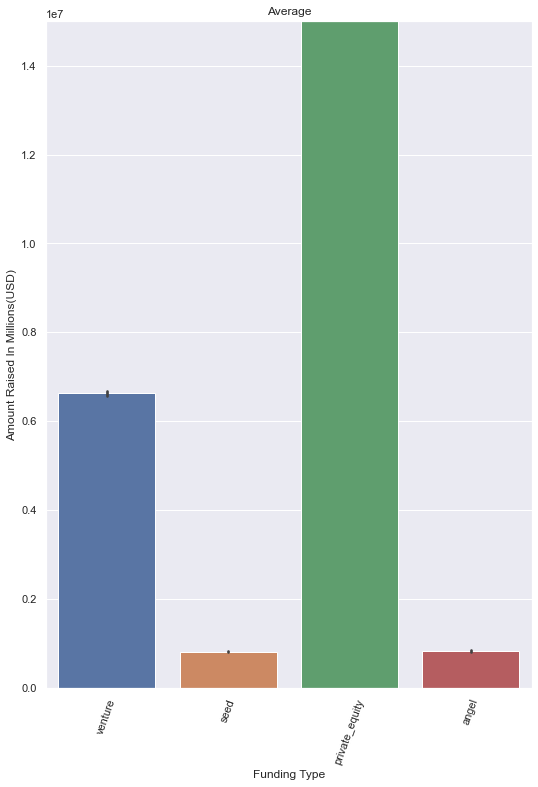

In [142]:
sns.set(rc={'figure.figsize':(8.7,12.27)})
plt.ylim(0, 15000000)
bar_plt = sns.barplot(data=interested_funding_frame, x='funding_round_type', y='raised_amount_usd', estimator=np.mean)
bar_plt.set(xlabel = "Funding Type", ylabel = "Amount Raised In Millions(USD)")
plt.title("Average")
plt.xticks(rotation=70)
plt.show()

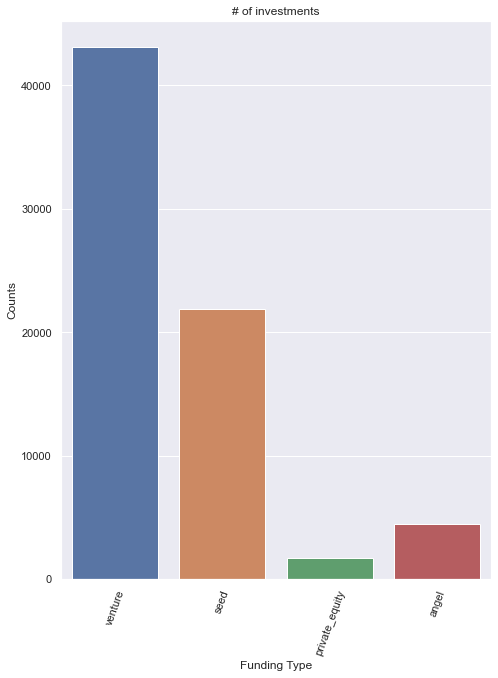

In [146]:
sns.set(rc={'figure.figsize':(7.7,10.27)})
count_plt = sns.countplot(data=interested_funding_frame, x='funding_round_type')
count_plt.set(ylabel = "Counts", xlabel = "Funding Type")
plt.title('# of investments')
plt.xticks(rotation=70)
plt.show()

In [ ]:
#### 2. Top 9 countries

top9.info()

In [91]:
order = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).keys()

In [93]:
order = venture_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(20).keys()

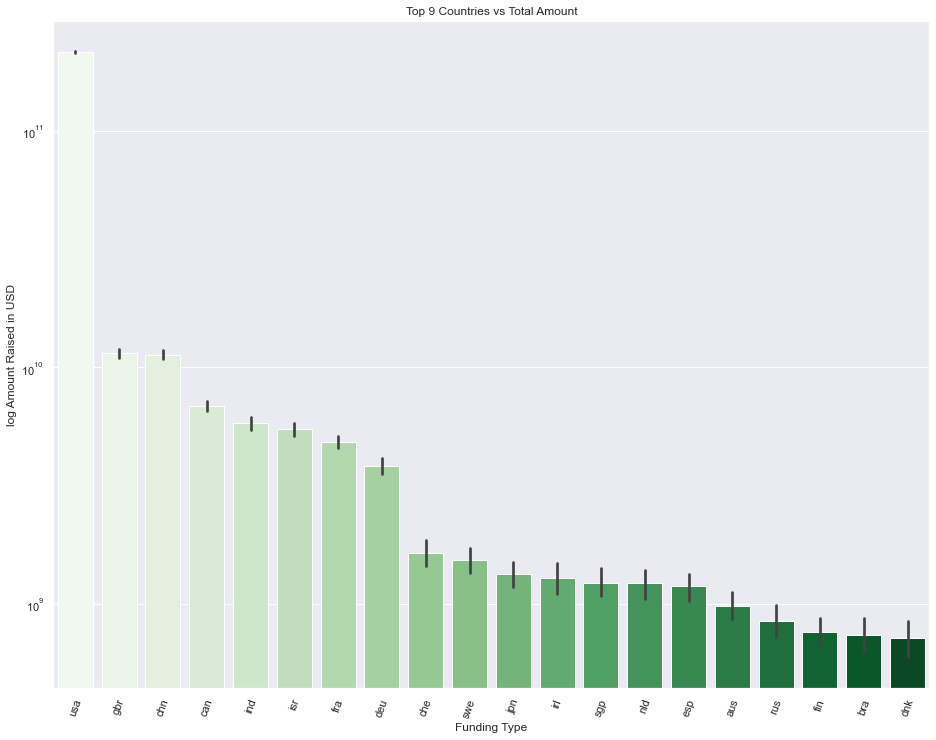

In [147]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
bar_plt = sns.barplot(data=venture_frame, x='country_code', y='raised_amount_usd', estimator=np.sum, palette="Greens", order=order)
bar_plt.set(xlabel = "Funding Type", ylabel = "log Amount Raised in USD")
bar_plt.set_yscale("log")
plt.title("Top 9 Countries vs Total Amount")
plt.xticks(rotation=70)
plt.show()

In [98]:
#### 3. Top 3 sector of the Top 3 countries

top3 = merged_df[merged_df['country_code'].isin(['usa', 'gbr', 'can'])]
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,nan,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,nan,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,nan,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,a,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,media,operating,usa,ca,los angeles,los angeles,nan,media,entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,nan,02-05-2013,650000.0,/organization/audiosocket,audiosocket,http://audiosocket.com,media|music|technology,operating,usa,wa,seattle,seattle,01-05-2008,media,entertainment


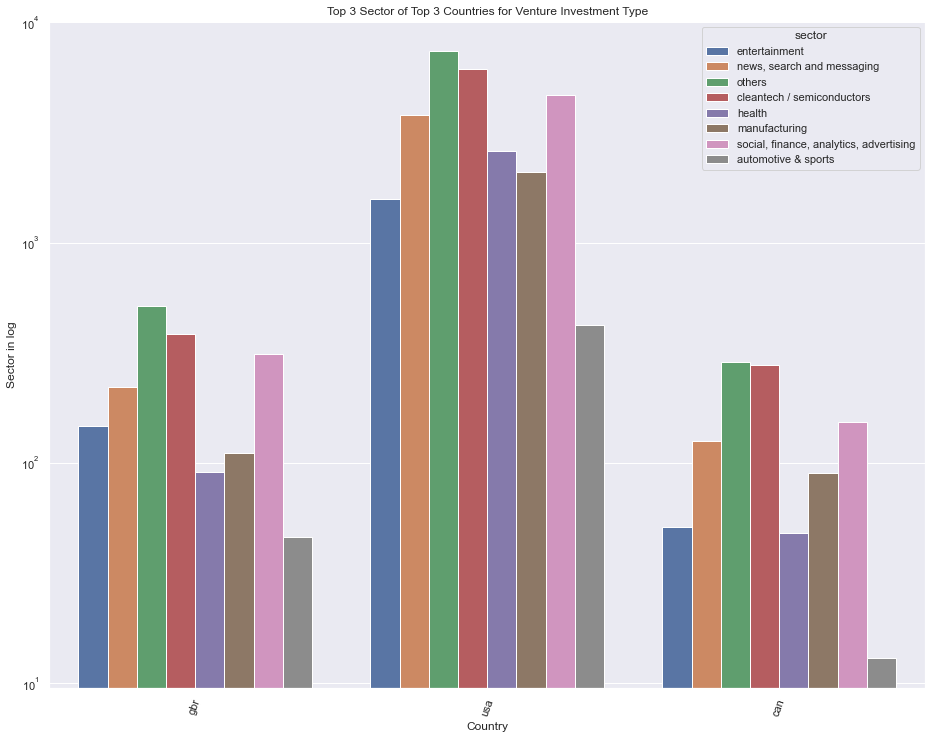

In [151]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
count_plt = sns.countplot(data=top3, x='country_code', hue='sector')
count_plt.set(xlabel = "Country", ylabel = "Sector in log")
count_plt.set_yscale("log")
plt.title('Top 3 Sector of Top 3 Countries for Venture Investment Type')
plt.xticks(rotation=70)
plt.show()